In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
l = pd.read_csv("restaurent.csv").sample(50,random_state=0)
l.reset_index(drop=True, inplace=True)
print(len(l))
l.head()

50


,food,decor,service,price
0,21.0,6.0,13.0,11.0
1,17.0,14.0,18.0,20.0
2,18.0,17.0,18.0,34.0
3,21.0,12.0,19.0,29.0
4,19.0,18.0,18.0,38.0


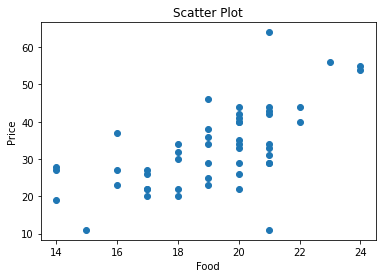

In [3]:
plt.scatter(l['food'],l['price'])
plt.title("Scatter Plot")
plt.xlabel("Food")
plt.ylabel("Price")
plt.show()

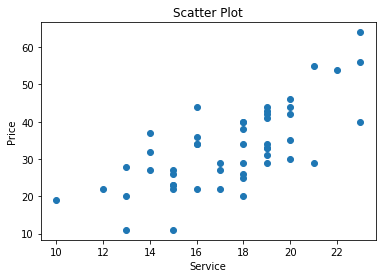

In [4]:
plt.scatter(l['service'],l['price'])
plt.title("Scatter Plot")
plt.xlabel("Service")
plt.ylabel("Price")
plt.show()

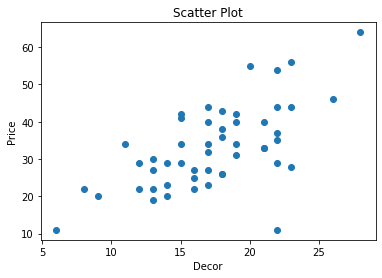

In [5]:
plt.scatter(l['decor'],l['price'])
plt.title("Scatter Plot")
plt.xlabel("Decor")
plt.ylabel("Price")
plt.show()

In [6]:
X_train, X_val, y_train, y_val = train_test_split(l[['food','decor','service']],l['price'],test_size=0.1,random_state=0)

In [7]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [8]:
prediction = model.predict(pd.DataFrame({'food':[125],'decor':[148],'service':[265]}))

In [9]:
print(model.coef_)
print(model.intercept_)

[1.99179795 1.1754104  0.63292725]
-36.50629647456809


In [10]:
stdev = np.sqrt(sum((model.predict(X_train) - y_train)**2) / (len(y_train) - 2))

In [11]:
confidence_interval = (prediction[0]-stdev*1.96, prediction[0]+stdev*1.96)
print(confidence_interval)

(541.5514432050051, 566.7583720662245)


In [12]:
model2 = LinearRegression()
X_train, X_val, y_train, y_val = train_test_split(np.array(l['food']).reshape(-1,1),np.array(l['price']).reshape(-1,1),test_size=0.1,random_state=0)
model2.fit(X_train,y_train)
print(model2.coef_)
print(model2.intercept_)

[[2.92641737]]
[-23.10977081]


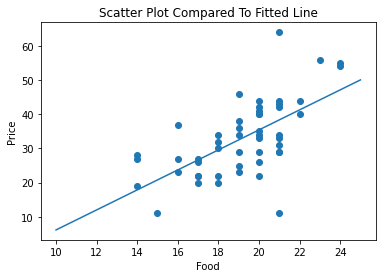

In [13]:
x = np.linspace(10,25,100)
y = model2.coef_[0]*x + model2.intercept_
plt.plot(x,y)
plt.scatter(l['food'],l['price'])
plt.title("Scatter Plot Compared To Fitted Line")
plt.xlabel("Food")
plt.ylabel("Price")
plt.plot()
plt.show()

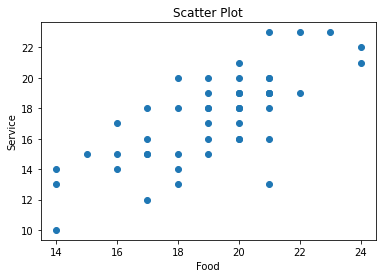

In [14]:
plt.scatter(l['food'],l['service'])
plt.title("Scatter Plot")
plt.xlabel("Food")
plt.ylabel("Service")
plt.show()

In [15]:
model.predict(pd.DataFrame({'food':[20],'decor':[3],'service':[17]}))

array([17.61565693])